### 1. Check Columns 
base_month : 기준년월<br>

leis_sports_cnt : 레저스포츠<br>

ref_view_cnt : 휴양 및 관람<br>

meet_work_cnt : 회의 및 업무<br>

visit_rel_cnt : 친지방문<br>

edu_trip_cnt : 교육여행<br>

etc_cnt : 기타방문<br>

total_visit_cnt : 총 입도객수

In [117]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [255]:
# dataset
df = pd.read_csv('./data/data.csv')
columns = list(df)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   base_month       91 non-null     int64
 1   leis_sports_cnt  91 non-null     int64
 2   ref_view_cnt     91 non-null     int64
 3   meet_work_cnt    91 non-null     int64
 4   visit_rel_cnt    91 non-null     int64
 5   edu_trip_cnt     91 non-null     int64
 6   etc_cnt          91 non-null     int64
 7   total_visit_cnt  91 non-null     int64
dtypes: int64(8)
memory usage: 5.8 KB


In [245]:
# Change base_month type to date
df['base_month'] = df['base_month'].astype('str')
df['base_month'] = df['base_month'].apply(lambda x: datetime.datetime.strptime(x, "%Y%m"))

In [246]:
df.head()

,base_month,leis_sports_cnt,ref_view_cnt,meet_work_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt
0,2015-01-01,127063,521304,75791,55457,3621,9432,792668
1,2015-02-01,134718,459032,72552,43058,202,12025,721587
2,2015-03-01,143528,490004,78294,44581,20466,14841,791714
3,2015-04-01,146259,623087,83467,27927,44893,13662,939295
4,2015-05-01,179944,628479,87166,29779,71746,18225,1015339


In [247]:
df.describe()

,leis_sports_cnt,ref_view_cnt,meet_work_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt
count,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000,9.100000e+01
mean,114388.593407,7.475025e+05,78727.417582,59168.835165,14504.703297,13402.505495,1.027695e+06
std,47783.330174,1.607794e+05,36119.852819,31272.366561,22197.846311,10122.836840,1.802875e+05
min,27181.000000,2.967420e+05,21955.000000,11593.000000,0.000000,0.000000,4.656720e+05
25%,73527.500000,6.506765e+05,54037.000000,32358.500000,81.000000,6813.000000,9.443415e+05
50%,117021.000000,7.582060e+05,71107.000000,55459.000000,3123.000000,10952.000000,1.066510e+06
75%,147625.000000,8.690640e+05,94278.500000,78080.000000,18179.500000,17081.000000,1.156234e+06
max,223950.000000,1.040438e+06,203258.000000,173601.000000,83508.000000,65940.000000,1.301963e+06


In [248]:
# Check NAN data
for col in df.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

columns: base_month	 Percent of NaN value: 0.00%
columns: leis_sports_cnt	 Percent of NaN value: 0.00%
columns: ref_view_cnt	 Percent of NaN value: 0.00%
columns: meet_work_cnt	 Percent of NaN value: 0.00%
columns: visit_rel_cnt	 Percent of NaN value: 0.00%
columns: edu_trip_cnt	 Percent of NaN value: 0.00%
columns:    etc_cnt	 Percent of NaN value: 0.00%
columns: total_visit_cnt	 Percent of NaN value: 0.00%


/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_4140/3904519238.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ref_view_cnt'])


<AxesSubplot:xlabel='ref_view_cnt', ylabel='Density'>

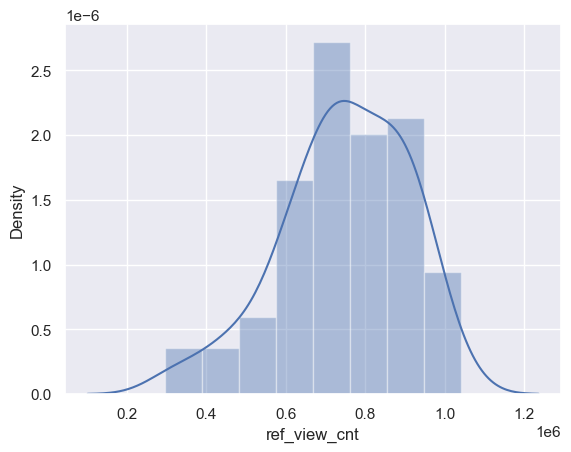

In [249]:
#histogram
sns.distplot(df['ref_view_cnt'])

#### histogram insight
- 정규분포에서 벗어난다.
- 첨도형이다.
- 정점을 가진다.

In [250]:
#skewness and kurtosis
print("Skewness: %f" % df['ref_view_cnt'].skew())
print("Kurtosis: %f" % df['ref_view_cnt'].kurt())

Skewness: -0.581173
Kurtosis: 0.084099


### Relationship with numerical variables

/Users/jin-yulim/miniforge3/envs/tf25/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


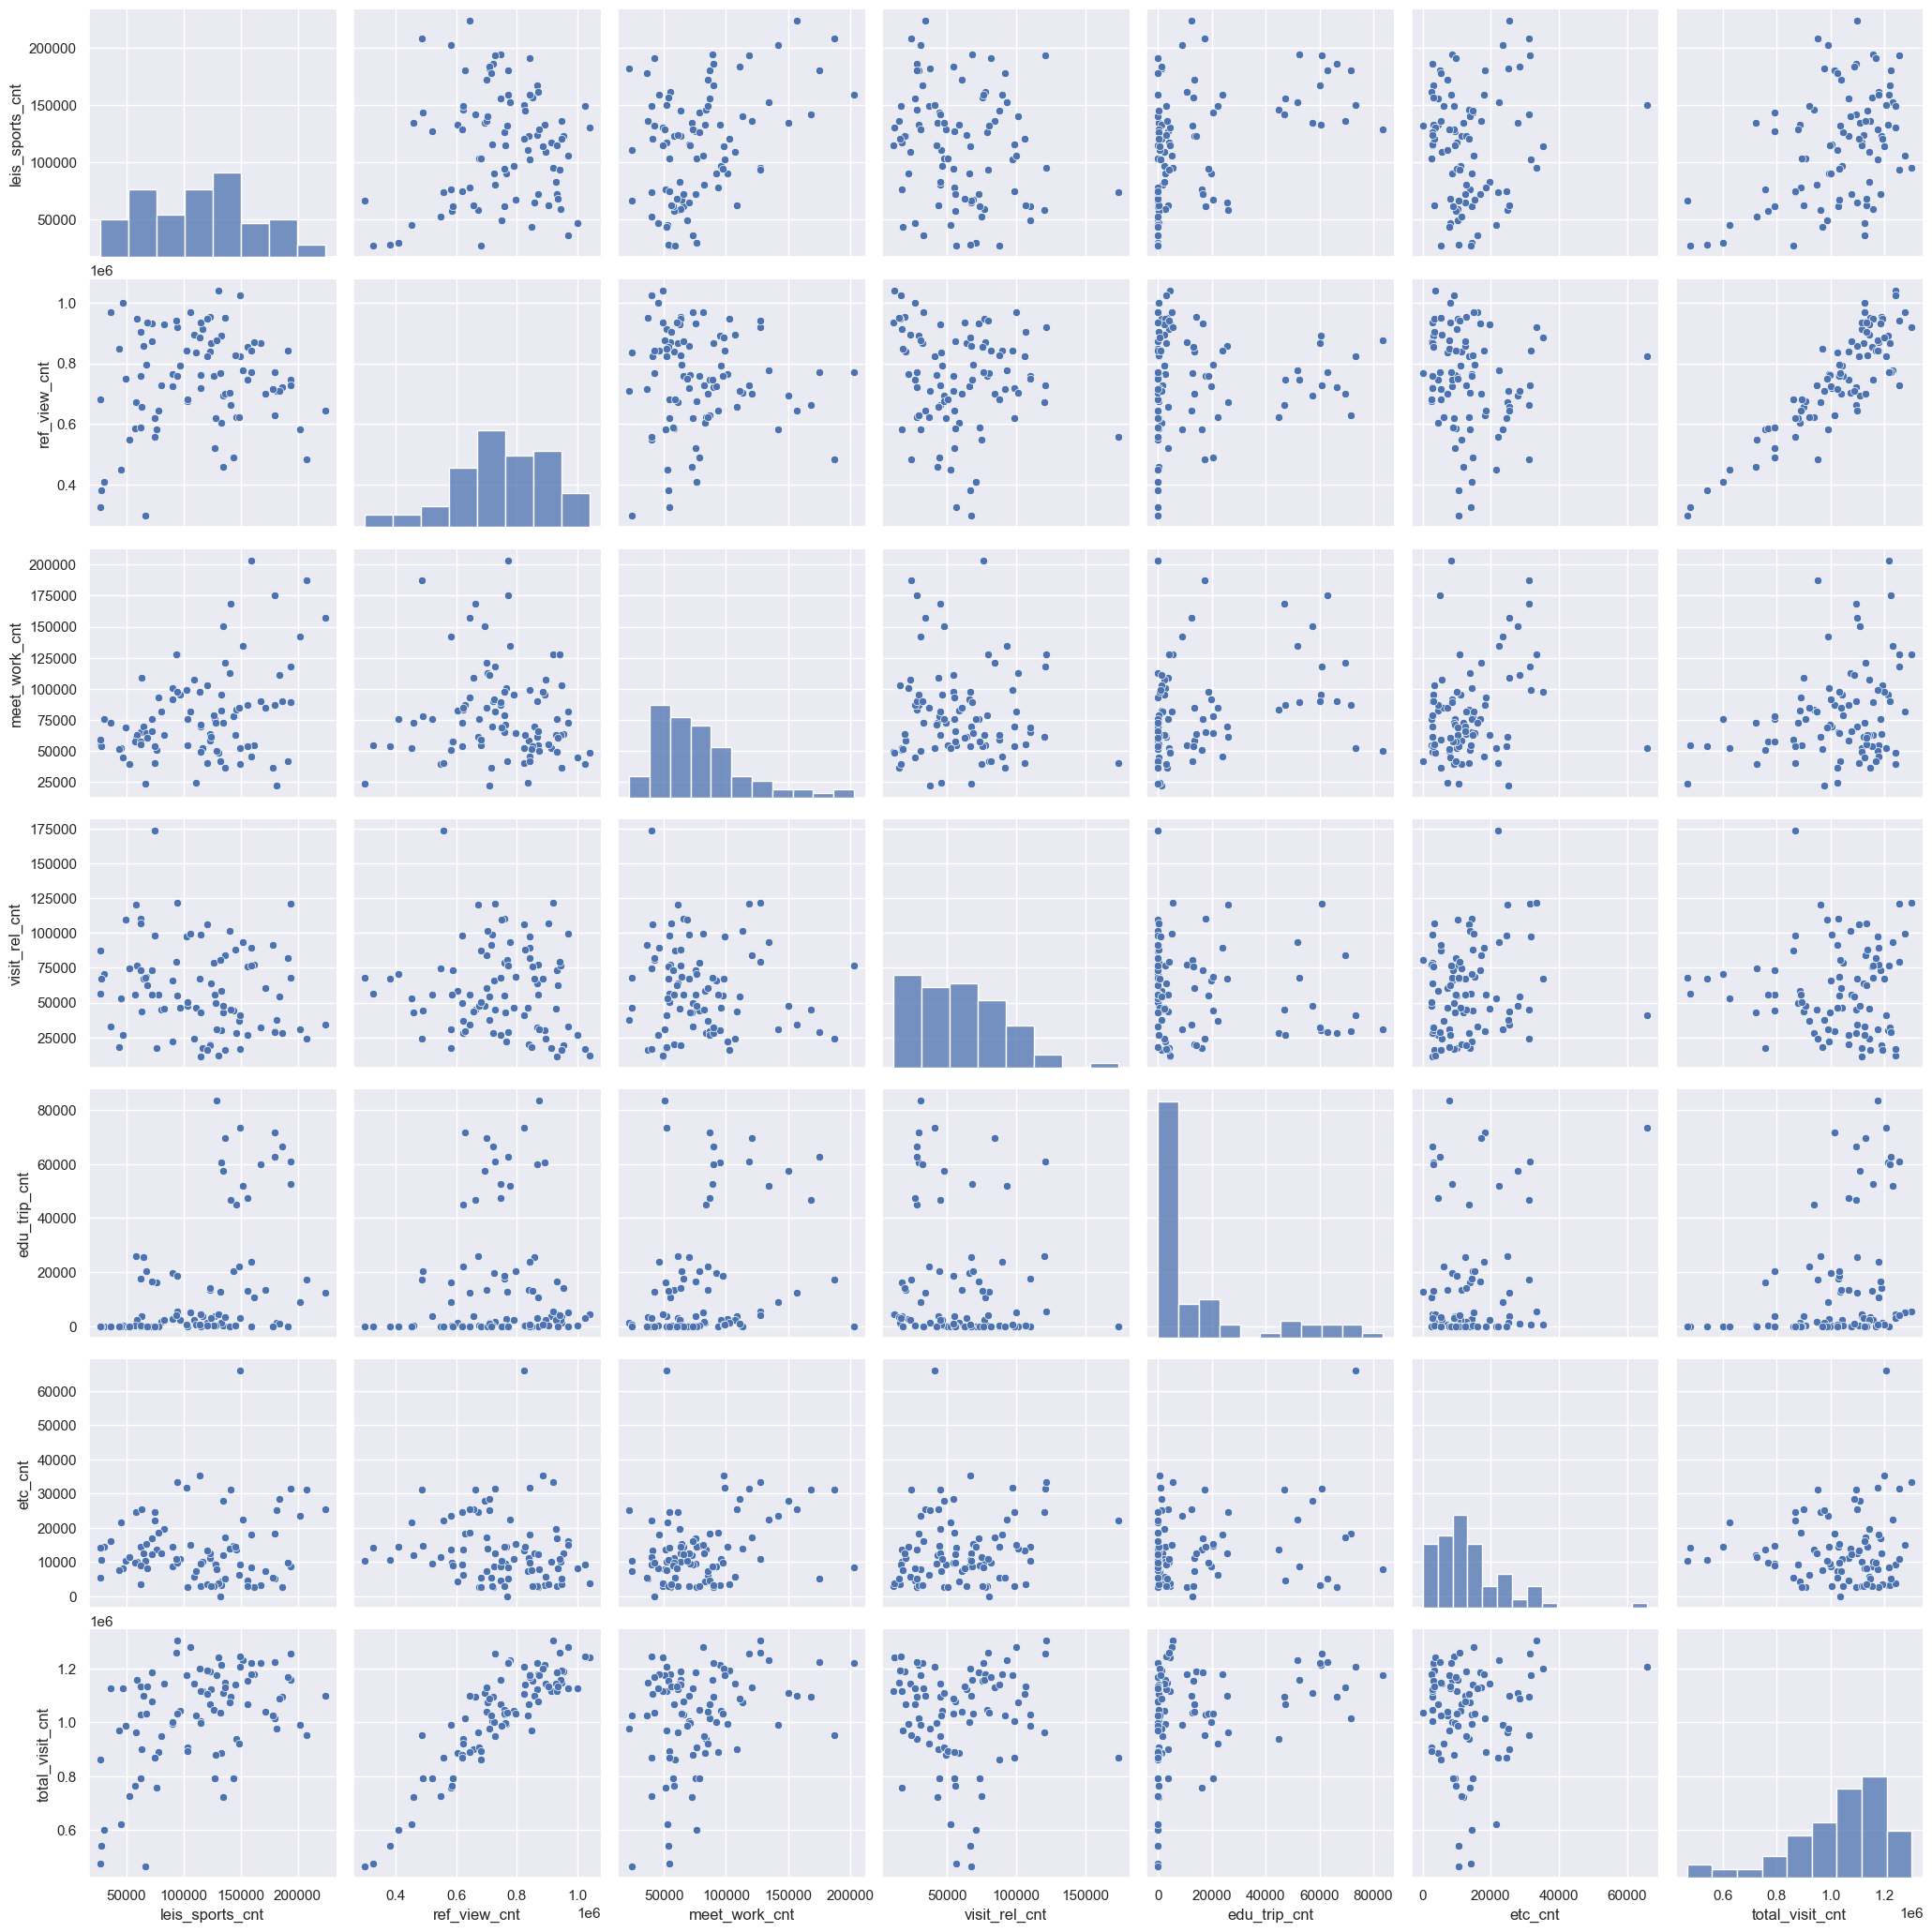

In [251]:
#scatterplot
sns.set()
sns.pairplot(df, size = 3)
plt.show();

#### scatter plot insight
- 레저 스포츠 목적에서 선형 관계를 가진다.
- 휴양 및 관람 목적에서 더 뚜렷한 선형 관계를 가진다.

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

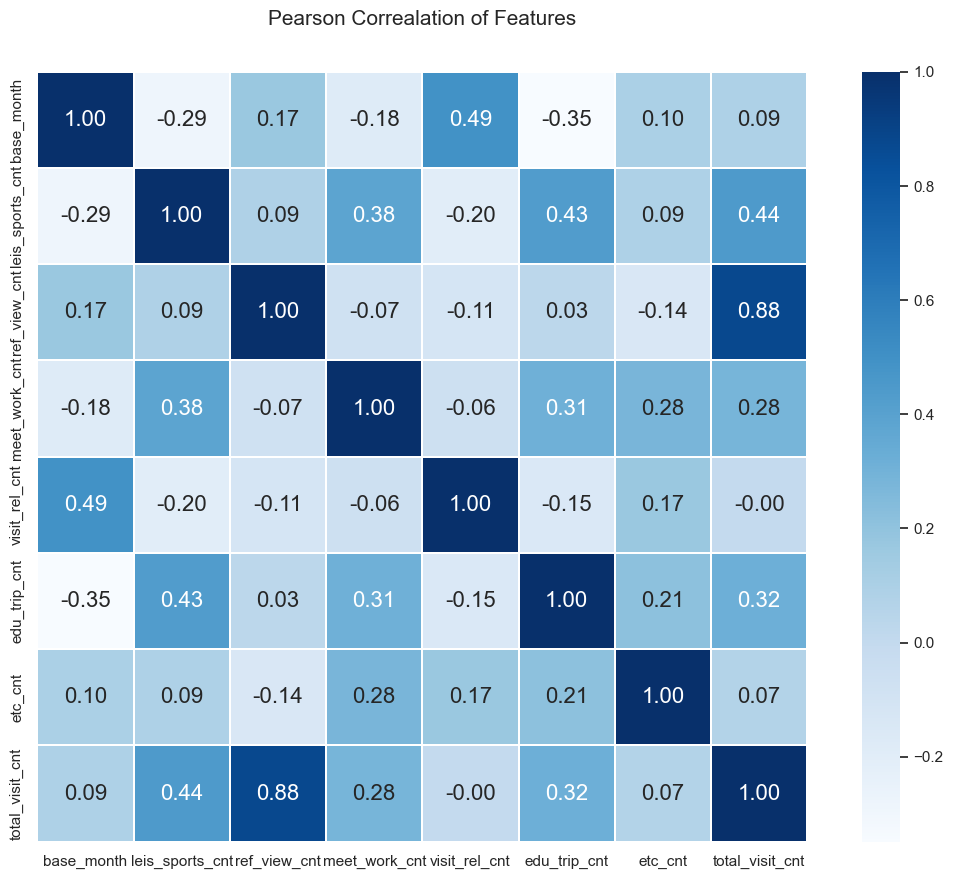

In [252]:
# heatmap
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(df.astype(int).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

휴가 및 관람 목적 -> 제주도 입도객의 수

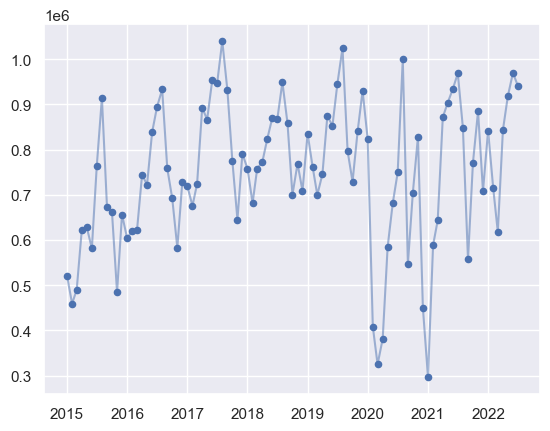

In [253]:
x = df['base_month']
y = df['ref_view_cnt']
plt.scatter(x, y, c = 'b', s = 20)
plt.plot(x, y, c = 'b', alpha = 0.5)

## 내국인 입도자 수 분석

In [258]:
# dataset
columns = ['구분연월', '개별여행', '부분패키지', '패키지', '레저스포츠', '회의및업무', '휴양및관람', '친지방문', '교육여행', '기타방문', '데이터기준일자']
def combine_data(start_year, end_year):
    df_domestic = pd.read_csv(f'./data/domestic_{start_year}.csv', encoding='cp949', on_bad_lines='skip')
    df_domestic.columns = columns
    for i in range(start_year + 1, end_year + 1):
        df_domestic_section = pd.read_csv(f'./data/domestic_{i}.csv', encoding='cp949', on_bad_lines='skip')
        df_domestic_section.columns = columns
        df_domestic = pd.concat([df_domestic, df_domestic_section], ignore_index=True)
    return df_domestic

In [282]:
df_domestic = combine_data(2015, 2021)
df_domestic = df_domestic.drop(columns='데이터기준일자')
df_domestic['총입도객'] = df_domestic.sum(axis=1)
df_domestic

/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_4140/1800350307.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_domestic['총입도객'] = df_domestic.sum(axis=1)


,구분연월,개별여행,부분패키지,패키지,레저스포츠,회의및업무,휴양및관람,친지방문,교육여행,기타방문,총입도객
0,2015-01,624526,96124,72018,127063,75791,521304,55457,3621,9432,1585336
1,2015-02,595357,103768,22462,134718,72552,459032,43058,202,12025,1443174
2,2015-03,635832,110797,45085,143528,78294,490004,44581,20466,14841,1583428
3,2015-04,600794,221013,117518,146259,83467,623087,27927,44893,13662,1878620
4,2015-05,760163,134508,120668,179944,87166,628479,29779,71746,18225,2030678
...,...,...,...,...,...,...,...,...,...,...,...
78,2021-08,942540,21839,5439,43445,51875,848667,18128,0,7703,1939636
79,2021-09,846565,20806,0,74382,40312,556900,173601,0,22176,1734742
80,2021-10,953193,191222,73740,159009,203258,770962,76544,15,8367,2436310
81,2021-11,980793,134590,84664,114236,97990,884800,66931,703,35387,2400094


,개별여행,부분패키지,패키지,레저스포츠,회의및업무,휴양및관람,친지방문,교육여행,기타방문,총입도객
0,624526,96124,72018,127063,75791,521304,55457,3621,9432,1585336
1,595357,103768,22462,134718,72552,459032,43058,202,12025,1443174
2,635832,110797,45085,143528,78294,490004,44581,20466,14841,1583428
3,600794,221013,117518,146259,83467,623087,27927,44893,13662,1878620
4,760163,134508,120668,179944,87166,628479,29779,71746,18225,2030678
...,...,...,...,...,...,...,...,...,...,...
78,942540,21839,5439,43445,51875,848667,18128,0,7703,1939636
79,846565,20806,0,74382,40312,556900,173601,0,22176,1734742
80,953193,191222,73740,159009,203258,770962,76544,15,8367,2436310
81,980793,134590,84664,114236,97990,884800,66931,703,35387,2400094
